In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense,Dropout, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


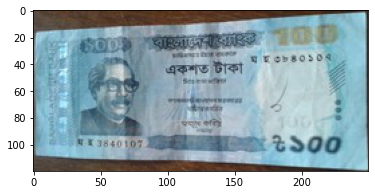

In [ ]:
im = image.load_img('/content/drive/MyDrive/BD BankNote/Training/100/100_1.jpg')

plt.imshow(im)



In [ ]:
cv2.imread('/content/drive/MyDrive/BD BankNote/Training/1/1_0.jpg').shape

(120, 250, 3)

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train.flow_from_directory(
    '/content/drive/MyDrive/BD BankNote/Training',
    target_size=(250,120),
    class_mode='categorical',
    batch_size=32
)

Found 1647 images belonging to 9 classes.


In [ ]:
test_generator = test.flow_from_directory(
    '/content/drive/MyDrive/BD BankNote/Testing/',
    target_size=(250,120),
    class_mode='categorical',
    batch_size=32
)

Found 0 images belonging to 0 classes.


In [ ]:
train_generator.class_indices

{'1': 0,
 '10': 1,
 '100': 2,
 '1000': 3,
 '2': 4,
 '20': 5,
 '5': 6,
 '50': 7,
 '500': 8}

In [ ]:
model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (250,120,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(9, activation='softmax')
    ])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 118, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 124, 59, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 57, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24128)            

In [ ]:
history = model.fit(
        train_generator,
        epochs = 10
    )

Epoch 1/10
52/52 [==============================] - 4s 74ms/step - loss: 2.6244 - acc: 0.2672
Epoch 2/10
52/52 [==============================] - 4s 75ms/step - loss: 1.3467 - acc: 0.6102
Epoch 3/10
52/52 [==============================] - 4s 75ms/step - loss: 0.6214 - acc: 0.8476
Epoch 4/10
52/52 [==============================] - 4s 74ms/step - loss: 0.4634 - acc: 0.8931
Epoch 5/10
52/52 [==============================] - 4s 74ms/step - loss: 0.3835 - acc: 0.9150
Epoch 6/10
52/52 [==============================] - 4s 73ms/step - loss: 0.1930 - acc: 0.9539
Epoch 7/10
52/52 [==============================] - 4s 73ms/step - loss: 0.1682 - acc: 0.9539
Epoch 8/10
52/52 [==============================] - 4s 75ms/step - loss: 0.1506 - acc: 0.9605
Epoch 9/10
52/52 [==============================] - 4s 76ms/step - loss: 0.1500 - acc: 0.9624
Epoch 10/10
52/52 [==============================] - 4s 74ms/step - loss: 0.0946 - acc: 0.9775


In [ ]:
from google.colab.patches import cv2_imshow

Saving image_2021-08-27_195831.png to image_2021-08-27_195831.png
Fifty Taka


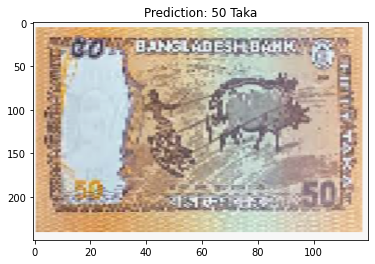

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(250, 120))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = np.argmax(model.predict(x), axis=-1)

  if classes[0] == 0:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: One Taka")
    print("One Taka")
    
  elif classes[0] == 1:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: Ten Taka")
    print("Ten Taka")

  elif classes[0] == 2:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: 100 Taka")
    print("Hundred Taka")
    
  elif classes[0] == 3:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: 1000 Taka")
    print("Thousand Taka")
    
  elif classes[0] == 4:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: Two Taka")
    print("Two Taka")
  
  elif classes[0] == 5:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: Twenty Taka")
    print("Twenty Taka")
    
  elif classes[0] == 6:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: Five Taka")
    print("Five Taka")
    
  elif classes[0] == 7:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: 50 Taka")
    print("Fifty Taka")

  elif classes[0] == 8:
    plt.imshow(img,aspect='auto')
    plt.title("Prediction: 500 Taka")
    print("Five Hundred Taka")
